In [ ]:
import json
import tensorflow as tf;
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import json

sentences = []
labels = []

with open("Sarcasm_Headlines_Dataset_v2.json", 'r') as f:
    for line in f:
        item = json.loads(line)
        sentences.append(item["headline"])
        labels.append(item['is_sarcastic'])


In [3]:
sentences[:5]

['thirtysomething scientists unveil doomsday clock of hair loss',
 'dem rep. totally nails why congress is falling short on gender, racial equality',
 'eat your veggies: 9 deliciously different recipes',
 'inclement weather prevents liar from getting to work',
 "mother comes pretty close to using word 'streaming' correctly"]

In [9]:
labels[:5]

[1, 0, 0, 1, 1]

In [10]:
training_size = 20000
train_data = sentences[:training_size]
test_data = sentences[training_size:]
training_labels = labels[:training_size]
test_labels = labels[training_size:]


In [ ]:
max_words = 10000
oov_tok = "<OOV>"

tk =Tokenizer(num_words=max_words,oov_token=oov_tok)
# oov token replaces any unseen word during testing. Hence, we generalize well.
tk.fit_on_texts(train_data)

In [ ]:
word_index = tk.word_index

In [13]:
first_5_pairs = list(word_index.items())[:5]
print(first_5_pairs)

[('<OOV>', 1), ('to', 2), ('of', 3), ('the', 4), ('in', 5)]


In [14]:
new_texts = ["I enjoy learning new things"]

# Convert new texts to sequences
sequences = tk.texts_to_sequences(new_texts)

# Print word index and sequences

print("Sequences:", sequences)

Sequences: [[83, 1801, 1033, 12, 135]]


In [15]:
max_length = 100
padding_type = 'post'
trunc_type = 'post'
training_sequences = tk.texts_to_sequences(train_data)
training_padded = pad_sequences(training_sequences,maxlen=100,padding=padding_type,truncating=trunc_type)

testing_sequences = tk.texts_to_sequences(test_data)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [16]:
import numpy as np;
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
test_labels = np.array(test_labels)


In [17]:
vocab_size = 10000
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels), verbose=2)

Epoch 1/30


625/625 - 4s - loss: 0.6674 - accuracy: 0.5990 - val_loss: 0.5670 - val_accuracy: 0.7717 - 4s/epoch - 6ms/step
Epoch 2/30
625/625 - 2s - loss: 0.4234 - accuracy: 0.8316 - val_loss: 0.3723 - val_accuracy: 0.8417 - 2s/epoch - 4ms/step
Epoch 3/30
625/625 - 2s - loss: 0.3130 - accuracy: 0.8752 - val_loss: 0.3419 - val_accuracy: 0.8540 - 2s/epoch - 4ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2607 - accuracy: 0.8982 - val_loss: 0.3307 - val_accuracy: 0.8587 - 2s/epoch - 4ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2266 - accuracy: 0.9127 - val_loss: 0.3331 - val_accuracy: 0.8556 - 2s/epoch - 4ms/step
Epoch 6/30
625/625 - 3s - loss: 0.1995 - accuracy: 0.9252 - val_loss: 0.3387 - val_accuracy: 0.8558 - 3s/epoch - 4ms/step
Epoch 7/30
625/625 - 3s - loss: 0.1768 - accuracy: 0.9352 - val_loss: 0.3606 - val_accuracy: 0.8465 - 3s/epoch - 4ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1595 - accuracy: 0.9421 - val_loss: 0.3673 - val_accuracy: 0.8499 - 2s/epoch - 4ms/step
Epoch 9/30
625/625 - 2

In [20]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tk.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 85ms/step
[[8.862545e-01]
 [8.370655e-09]]


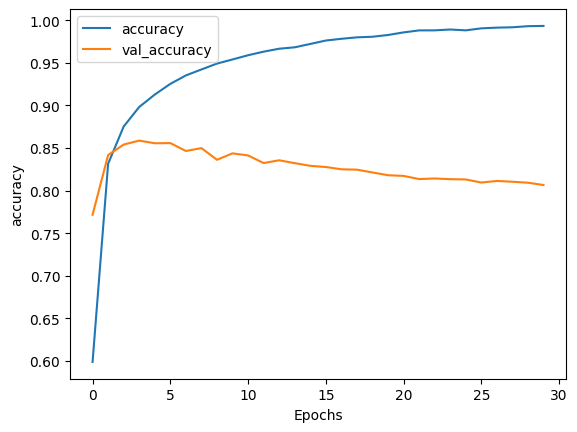

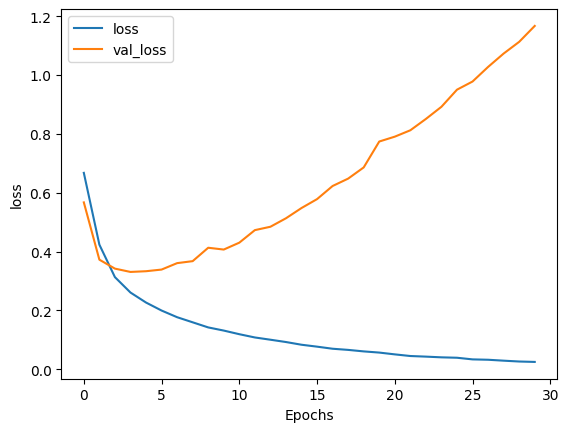

In [21]:
from utils import plot_graph
# History is an object returned by the model.fit() function  that contains the history of various metrices across
# diffferent epochs ( for both training and validation set )
plot_graph(history, "accuracy")
plot_graph(history, "loss")

In [22]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [26]:
testing_padded[0]

array([  83, 4338,    1,    6, 2186,  137,  625,  181,   31,   28, 3008,
         56,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [28]:
y_pred = model.predict(testing_padded)  # Predict labels
y_pred[0]
for i in range(0,len(y_pred)):
    if y_pred[i]>0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

y_pred[:7]



270/270 [==============================] - 1s 2ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [31]:
# Convert probabilities to binary class labels
y_pred_binary = (y_pred >= 0.5).astype(int)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_labels, y_pred_binary)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 80.66%


In [34]:
from sklearn.metrics import classification_report, f1_score

# Assuming y_test are the true labels and y_pred are the predicted class labels
print("Classification Report:")
print(classification_report(test_labels, y_pred_binary))

# Compute the F1 score
f1 = f1_score(test_labels, y_pred_binary, average='weighted')  # Use 'micro', 'macro', or 'weighted' as needed
print(f"Weighted F1 Score: {f1:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      4524
           1       0.80      0.79      0.80      4095

    accuracy                           0.81      8619
   macro avg       0.81      0.81      0.81      8619
weighted avg       0.81      0.81      0.81      8619

Weighted F1 Score: 0.81


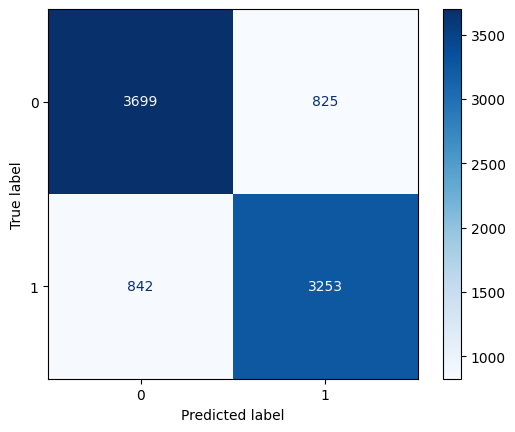

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(test_labels, y_pred_binary)

# Ensure `display_labels` matches the number of classes in `y_test` and `y_pred`
labels = list(set(test_labels))  # Unique labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot confusion matrix
disp.plot(cmap='Blues')
plt.show()
